# Predicting Genre of Spotify Songs
<strong>Programming language:</strong> R<br/>
<strong>Dataset source:</strong> Kaggle - [Dataset of songs in Spotify][id].

[id]: https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify "dataset"

## Overview
In this post, I will use five different models, Multiclass Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and XGBoost, to predict songs' genre, evaluate models' performance using metrics, and find the significant audio features when predicting. 

## Project Background
Spotify is a digital music service that gives customers access to millions of songs. To provide better customer services, Spotify provides different genre-based playlists for the customers to discover. There are many different types of genres in music, based on the way or style of music is composed. Thus, this project aims to see if we can correctly predict the music genre of a song and which audio features are important when forecasting.

## Dataset Overview
The "genres_v2" dataset, downloaded from Kaggle, was last updated on Dec 6, 2020. There are 42305 observations of 22 variables, containing information about a song.

In [1]:
# Load library
library(tidyverse)
library(magrittr)
library(ggplot2)
library(BBmisc)
library(class)
library(kknn)
library(DMwR)
library(caret)
library(Information)
library(ROSE)
library(UBL)
library(randomForest)
library(rpart)
library(rpart.plot)
library(xgboost)
library(vip)
library(ggpubr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘BBmisc’


The following objects are masked from ‘package:dplyr’:

    coalesce, collapse


The following object is masked from ‘package:base’:

    isFALSE


Loading required package: lattice

Loading required package: grid


Attaching package: ‘grid’


The following object is masked from ‘package:BBmisc’:

    explode


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
# Load data
df <- read.csv(file = "~/Desktop/Q4 -Winter/Predictive Analytics/Final Project/genres_v2.csv", header=TRUE)

In [3]:
dim(df)

[1] 42305    22

In [4]:
str(df)

'data.frame':	42305 obs. of  22 variables:
 $ danceability    : num  0.831 0.719 0.85 0.476 0.798 0.721 0.718 0.694 0.774 0.893 ...
 $ energy          : num  0.814 0.493 0.893 0.781 0.624 0.568 0.668 0.711 0.751 0.907 ...
 $ key             : int  2 8 5 0 2 0 8 8 1 11 ...
 $ loudness        : num  -7.36 -7.23 -4.78 -4.71 -7.67 ...
 $ mode            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ speechiness     : num  0.42 0.0794 0.0623 0.103 0.293 0.414 0.137 0.221 0.198 0.367 ...
 $ acousticness    : num  0.0598 0.401 0.0138 0.0237 0.217 0.0452 0.0254 0.0397 0.0614 0.152 ...
 $ instrumentalness: num  1.34e-02 0.00 4.14e-06 0.00 0.00 2.12e-01 7.80e-03 0.00 0.00 3.11e-02 ...
 $ liveness        : num  0.0556 0.118 0.372 0.114 0.166 0.128 0.124 0.112 0.0728 0.558 ...
 $ valence         : num  0.389 0.124 0.0391 0.175 0.591 0.109 0.038 0.283 0.189 0.302 ...
 $ tempo           : num  157 115 218 187 148 ...
 $ type            : Factor w/ 1 level "audio_features": 1 1 1 1 1 1 1 1 1 1 ...
 $ id          

## Exploratory Data Analysis
### 1. Variable Identification
Regarding independent variables, I removed text columns and kept only numerical columns. In terms of the dependent variable, column "genre" was used and there are 15 different kinds of genre.

In [5]:
# Select independent variables (X)
df <- select(df, -c('type','id','uri','track_href','analysis_url',
                    'song_name','Unnamed..0','title'))
unique(df$genre)

[1] Dark Trap       Underground Rap Trap Metal      Emo            
 [5] Rap             RnB             Pop             Hiphop         
 [9] techhouse       techno          trance          psytrance      
[13] trap            dnb             hardstyle      
15 Levels: Dark Trap dnb Emo hardstyle Hiphop Pop psytrance Rap ... Underground Rap

In [6]:
dim(df)

[1] 42305    14

### 2. Univariate Analysis
#### a) Categorical Variable
I created a bar chart of the target variable “genre.” From the graph below, we can tell that the dataset is imbalanced. For instance, there are nearly 6000 records are “Underground Rap”, while less than 500 records are “Pop” music.

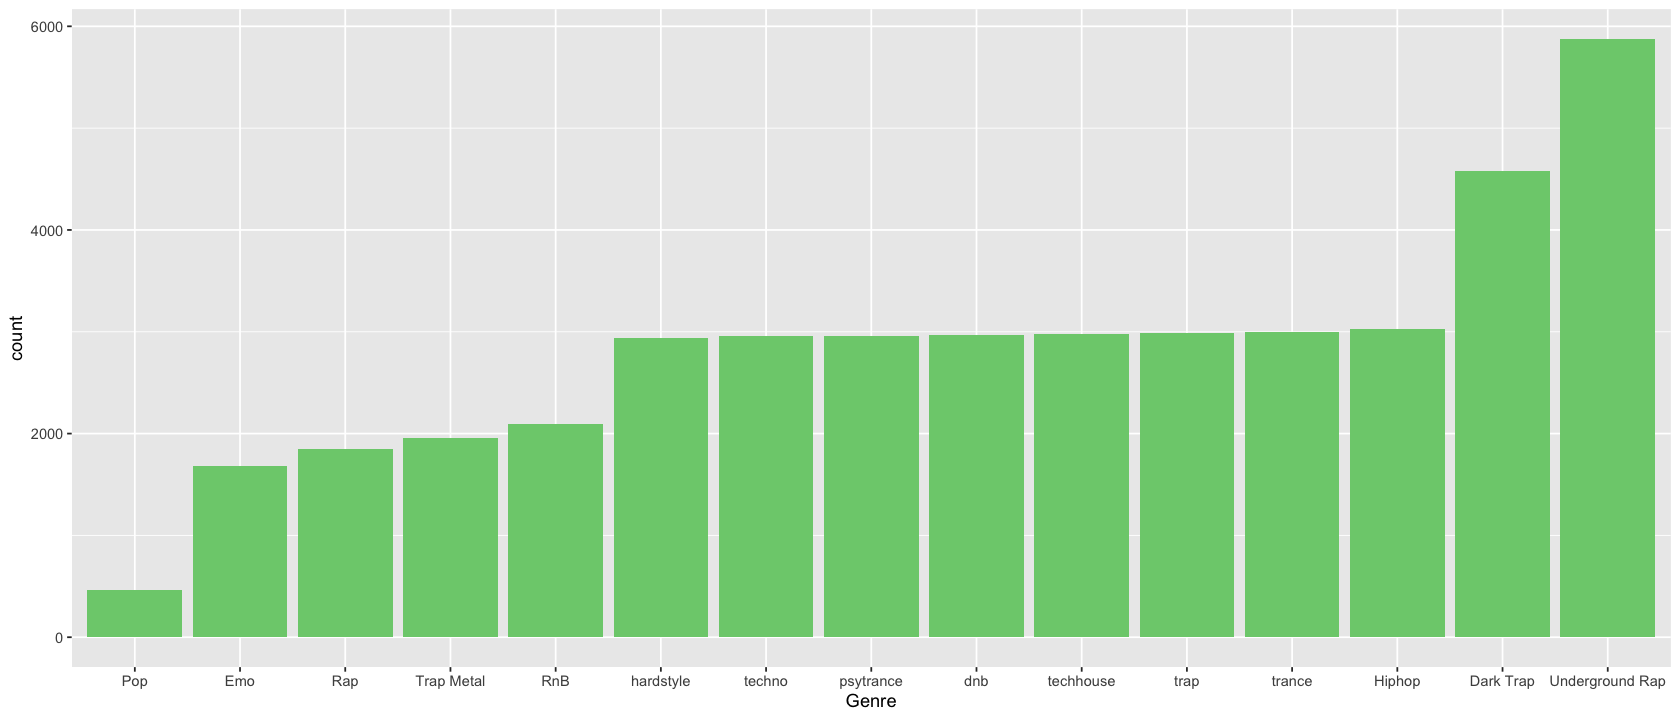

In [7]:
options(repr.plot.width = 14, repr.plot.height = 6)
genre_bp <- ggplot(df, aes(x=reorder(genre, genre, FUN = length)))+ 
geom_bar(stat="count", width=0.9, fill = "palegreen3") + labs(x = "Genre")
genre_bp

#### b) Numerical Variables
I created histograms and a boxplot to visualize numerical variables.

In [8]:
X_num <- ncol(df)-1
for (i in 1:X_num) {
    colname <- colnames(df[i])
    assign(paste("his", i, sep = "_"),
    ggplot(df, aes_string(x=colname)) + geom_histogram(fill = "palegreen3", binwidth=0.1) +
    ggtitle(paste("Histogram of", colname)) +  theme(plot.title = element_text(hjust = 0.5)))
}

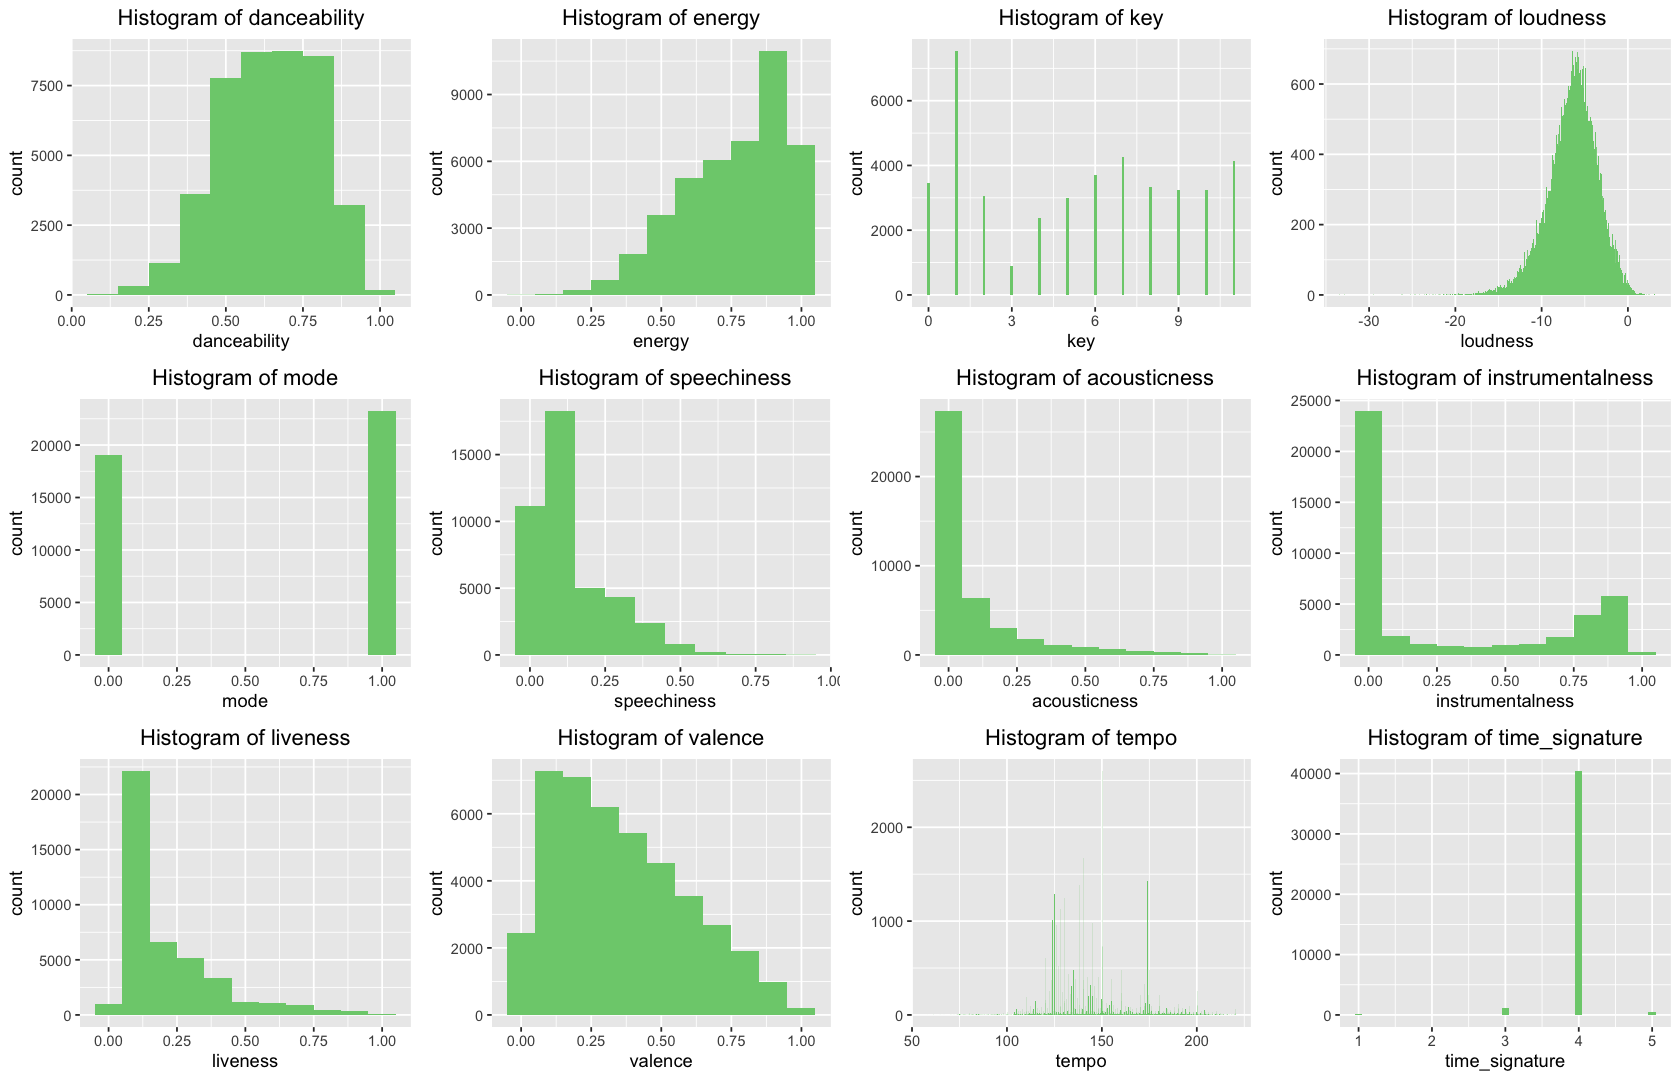

In [9]:
options(repr.plot.width = 14, repr.plot.height = 9)
ggarrange(his_1, his_2, his_3, his_4, his_5, his_6, his_7, his_8, his_9, his_10, his_11, his_13, nrow = 3, ncol = 4)

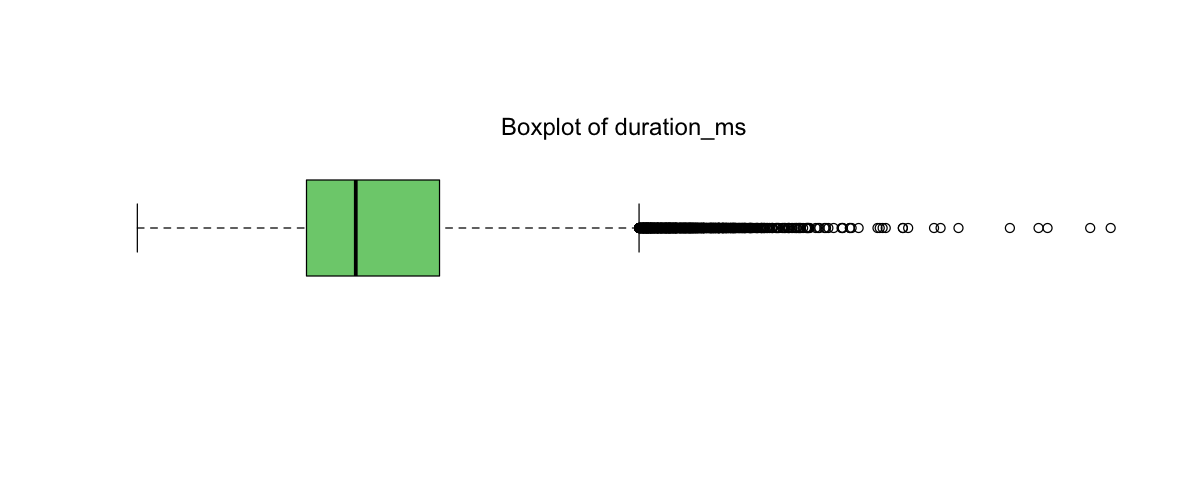

In [10]:
options(repr.plot.width = 10, repr.plot.height = 4)
boxplot(df$duration_ms, horizontal=TRUE, col="palegreen3", axes=FALSE)
title("Boxplot of duration_ms", line = -1.5, font.main = 1) # Adjust plot title position

From the charts above, we can tell that most of the distributions of numerical variables were skewed and had outliers. Perhaps in the future, for right skewed data, we can perform log transformation, since it both de-emphasizes outliers and removes skewness, and for left skewed data, we can perform square transformation.

### 3. Bi-variate Analysis
To perform a bi-variate analysis, I created a boxplot of the variables “genre” and “valence.” Valence is used to describe the musical positiveness conveyed by a track. That is, tracks with high valence sound more positive, while tracks with low valence sound more negative. From the graph below, we can tell that genres such as “Trap” and “techno” are more negative, and genres such as “Pop” and “RnB” are more positive.

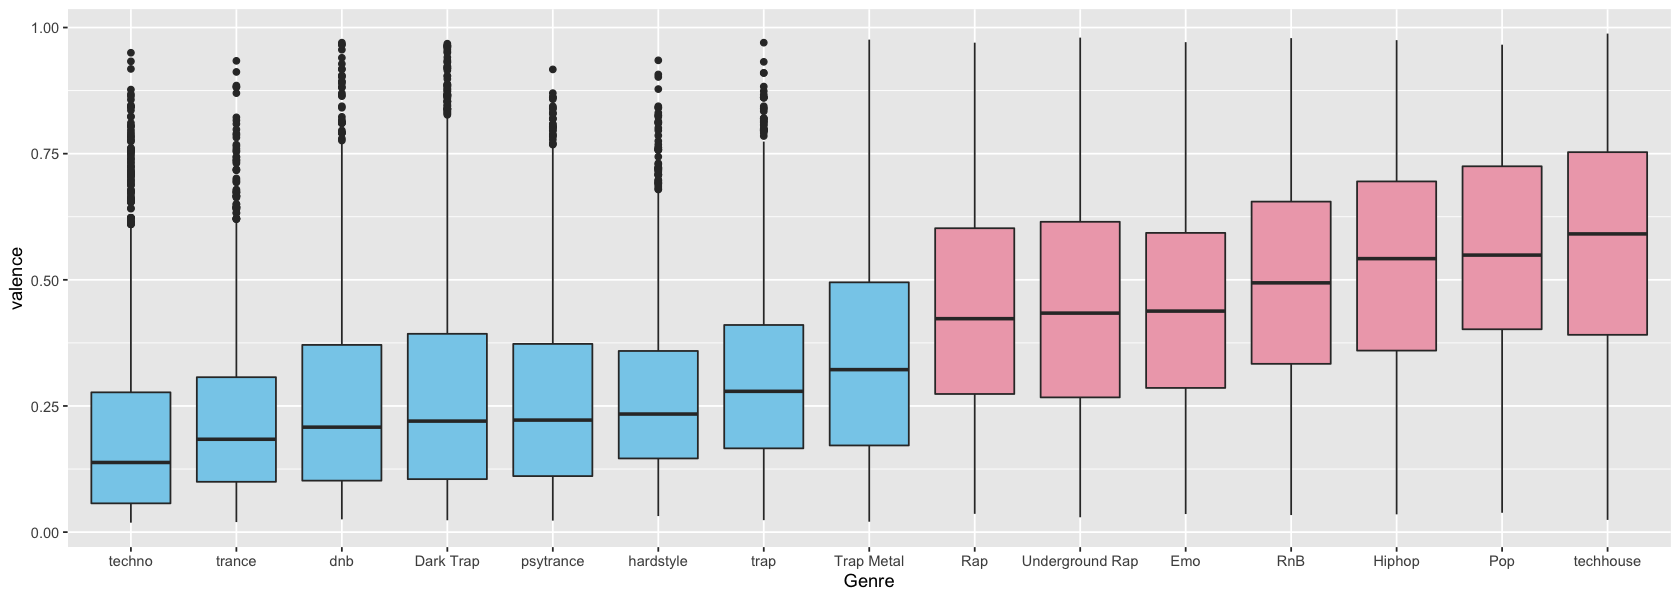

In [11]:
options(repr.plot.width = 14, repr.plot.height = 5)
valence_genre_bp <- ggplot(df, aes(x = reorder(genre, valence, FUN = median), 
                               y = valence, fill=genre)) + geom_boxplot()+theme(legend.position="none")
valence_genre_bp + scale_fill_manual(values=c("skyblue", "skyblue", "pink2", "skyblue", 
                                              "pink2", "pink2","skyblue","pink2", "pink2",
                                              "pink2", "skyblue", "skyblue", "skyblue",
                                              "skyblue", "pink2")) + labs(x = "Genre")

### 4. Missing Value Treatment 
There is no missing value need to be treated.

In [12]:
colSums(is.na(df)) 

danceability           energy              key         loudness 
               0                0                0                0 
            mode      speechiness     acousticness instrumentalness 
               0                0                0                0 
        liveness          valence            tempo      duration_ms 
               0                0                0                0 
  time_signature            genre 
               0                0

### 5. Outliers Treatment
Previously we found that there are some outliers. Thus, we first examined the percentage of outliers for each numerical variable.

In [13]:
# Calculate % of outliers using interquartile range method
outlier_per <- function(x){
    lowerq = quantile(x)[2]
    upperq = quantile(x)[4]
    iqr = upperq - lowerq
    threshold_upper = (iqr * 1.5) + upperq
    threshold_lower = lowerq - (iqr * 1.5)
    count <- length(which(x > threshold_upper | x < threshold_lower))
    per <- count/length(x)
    result <- per*100
    result
}

In [14]:
X_num <- ncol(df)-1
for (i in 1:X_num) {
    colname <- colnames(df[i])
    outliers <- round(outlier_per(df[,i]),2)
    cat(colname,":", outliers,"% ")
}

danceability : 0.11 % energy : 0.33 % key : 0 % loudness : 1.88 % mode : 0 % speechiness : 4.53 % acousticness : 12.17 % instrumentalness : 0 % liveness : 5.9 % valence : 0 % tempo : 1.26 % duration_ms : 2.88 % time_signature : 4.44 % 

Since the dataset is quite big, I directly deleted outliers that are less than 1%.

In [15]:
# Delete outliers using interquartile range method
delete_outliers <- function(df, x){
    lowerq = quantile(x)[2]
    upperq = quantile(x)[4]
    iqr = upperq - lowerq
    threshold_upper = (iqr * 1.5) + upperq
    threshold_lower = lowerq - (iqr * 1.5)
    df<- subset(df, x>threshold_lower & x<threshold_upper)
    df
}

In [16]:
# Delete outliers of danceability and energy (< 1%)
df<-delete_outliers(df, df$danceability)
df<-delete_outliers(df, df$energy)

In [17]:
dim(df)

[1] 42125    14

As we can see above, the dataset was decreased to 42125 observations. Perhaps in the future, we can treat the remaining outliers using binning or subset.

## Data Preprocessing
### 1. Feature Scaling
I standardized data using <em>scale</em> function, since predictors have varying scales and models such as KNN are distance-based. Perhaps in the future, we can try to use robust data scaling (robust standardization), since it wil ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.

In [18]:
Y_index <- ncol(df)
X <- df[-Y_index]

X_scaled <- scale(X)
X_scaled <- as.data.frame(X_scaled)
df_scaled <-cbind(X_scaled, genre=df[Y_index])

### 2. Split into Training & Test
I split dataset into training (0.8) and test (0.2).

In [19]:
set.seed(2021)
train_ind <- sample(seq_len(nrow(df_scaled)), size = 0.8*nrow(df_scaled))
train <- df_scaled[train_ind,]
test <- df_scaled[-train_ind,]

### 3.  Balance Training data
From the EDA, I found that the dataset is imbalanced. Thus, to balance the data, I used <em>SMOTE</em> function to perform undersampling on the majority and oversampling on the minority.

In [20]:
table(train$genre)


      Dark Trap             dnb             Emo       hardstyle          Hiphop 
           3588            2369            1311            2369            2370 
            Pop       psytrance             Rap             RnB       techhouse 
            370            2344            1478            1651            2360 
         techno          trance            trap      Trap Metal Underground Rap 
           2358            2416            2371            1546            4799 

In [21]:
bal_train <- SmoteClassif(genre~., train, C.perc = "balance")
table(bal_train$genre)


      Dark Trap             dnb             Emo       hardstyle          Hiphop 
           2247            2247            2246            2247            2247 
            Pop       psytrance             Rap             RnB       techhouse 
           2247            2247            2247            2247            2247 
         techno          trance            trap      Trap Metal Underground Rap 
           2247            2247            2247            2247            2247 

## Data Modeling
### 1. Multiclass Logistic Regression
#### a) Build 15 Logistic Regression Models (one per genre)
Since there are 15 classes in "genre," I used For loop to build a total of 15 logistic regressions and predicted on the test dataset. To be more specific, in each model, I relabeled the target variable with a 1 if it corresponded to the genre I was training for, and 0 otherwise.

In [22]:
genres_num <- length(unique(bal_train$genre))
for (i in 1:genres_num)
  {
  bal_train_loop <- bal_train
  bal_train_loop$genre = ifelse(bal_train_loop$genre==levels(as.factor(bal_train$genre))[i],1,0)
  GLM <- glm(genre~., family=binomial(link = "logit"), data=bal_train_loop)
  assign(paste("GLM", i, sep = "_"), predict(GLM, newdata = test, type='response'))
}

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


#### b) Softmax Function
After predicting, I obtained 15 probabilities per song. By using the <em>Softmax</em> function, I transformed those unrelated probabilities into a probability distribution over the 15 genres, and the predicted genre will be the one associated with the maximum probability.

In [23]:
# Softmax function
softmax_function <- function(par){
  n.par <- length(par)
  par1 <- sort(par, decreasing = TRUE)
  Lk <- par1[1]
  for (k in 1:(n.par-1)) {
    Lk <- max(par1[k+1], Lk) + log1p(exp(-abs(par1[k+1] - Lk))) 
  }
  val <- exp(par - Lk)
  return(val)
}

In [24]:
Predict_list <- c()
Actual_list <- test$genre

test_num <- nrow(test)
for(i in 1:test_num){
  Unrelated_Prob <- c(GLM_1[i],GLM_2[i],GLM_3[i],GLM_4[i],GLM_5[i],GLM_6[i],GLM_7[i],GLM_8[i]
                      ,GLM_9[i],GLM_10[i],GLM_11[i],GLM_12[i],GLM_13[i],GLM_14[i],GLM_15[i])
  Related_Prob <- softmax_function(Unrelated_Prob)
  j <- which(Related_Prob==max(Related_Prob))
  Predict_list[[i]] <- levels(as.factor(bal_train$genre))[j]
  }

#### c) Evaluate Model Performance

Finally, I built a confusion matrix and calculated the accuracy of GLM, which is around 53%.

In [25]:
GLM_metrics <- confusionMatrix(factor(Predict_list[]), Actual_list)
GLM_metrics$overall # Accuracy = 0.53

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.5291395      0.4946451      0.5184131      0.5398456      0.1268843 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

### 2. K-Nearest Neighbors
To find optimal k, I set k equals to odd, from 1 to 60, used For loop, and plotted the accuracy results. There are two distance functions, including Euclidean and Manhattan.

In [26]:
# Separate X and y
# Train data
bal_train_X <- bal_train[-Y_index]
bal_train_Y <- as.matrix(bal_train[Y_index])

# Test data
test_X <- test[-Y_index]
test_Y <- as.matrix(test[Y_index])

# k values
k_values <-seq(1, by = 2, len = 30)

#### a) Euclidean Distance
- Find optimal k

In [27]:
set.seed(2020)
k.optm=1
for (i in k_values)
  {
  knn.mod <- knn(bal_train_X, test_X, cl=bal_train_Y, k=i)
  k.optm[i] <- 100 * sum(test_Y == knn.mod)/NROW(test_Y)
}

[1] 33

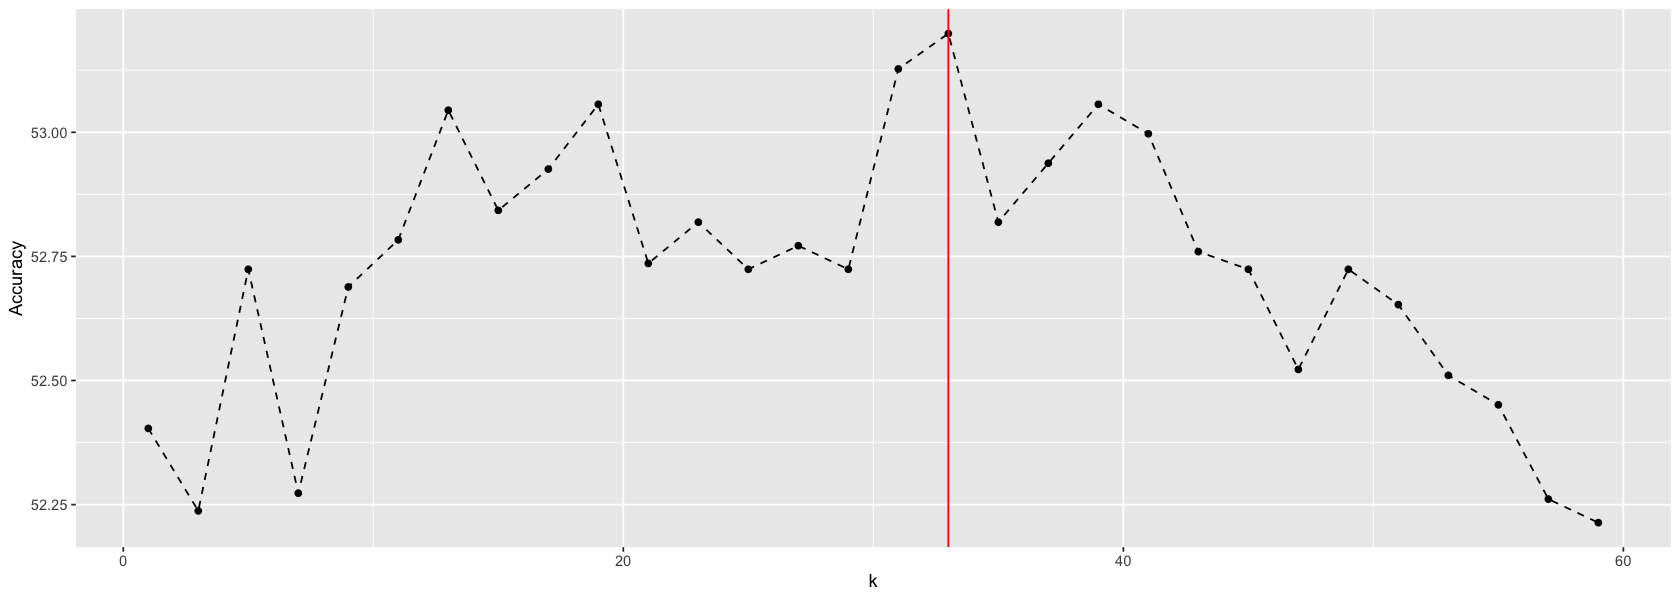

In [28]:
# Accuracy plot
k.optm <- k.optm[!is.na(k.optm)]
k_value_accuracy <- data.frame("k" = k_values, "Accuracy" = k.optm)
index <- which(k_value_accuracy$Accuracy == max(k_value_accuracy$Accuracy))
optimal_k <- k_value_accuracy$k[index]

k_accuracy_plot <- ggplot(data=k_value_accuracy, aes(x=k, y=Accuracy, group=1)) + 
  geom_line(linetype = "dashed")+ geom_point() + 
  geom_vline(xintercept=optimal_k, color="red")

k_accuracy_plot 
optimal_k # 33

- Evaluate Model Performance

In [29]:
set.seed(2020)
KNN_Eu <- knn(bal_train_X, test_X, cl=bal_train_Y, k = optimal_k)
KNN_Eu_metrics <- confusionMatrix(factor(KNN_Eu),factor(test_Y))
KNN_Eu_metrics$overall # Accuracy = 0.53

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.5303264      0.4973916      0.5196012      0.5410307      0.1268843 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

#### b) Manhattan Distance
- Find optimal k

In [30]:
set.seed(2020)
k.optm=1
for (i in k_values)
  {
  knn.mod <- kknn(genre~., train = bal_train, test = test, k=i, distance = 1, scale = 0)
  knn.mod_fit <- knn.mod$fitted.values
  k.optm[i] <- 100 * sum(test_Y == knn.mod_fit)/NROW(test_Y)
}

[1] 43

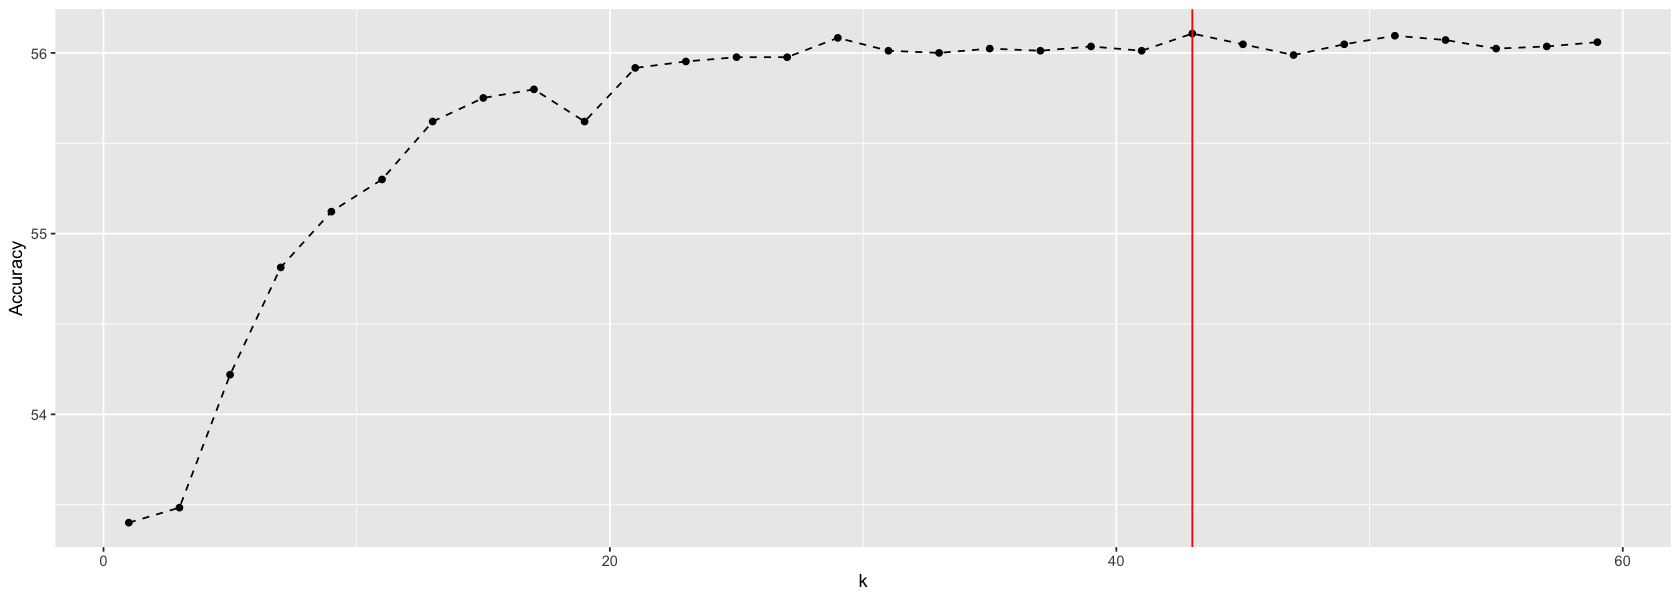

In [31]:
# Accuracy plot
k.optm<-k.optm[!is.na(k.optm)]
k_value_accuracy <- data.frame("k" = k_values, "Accuracy" = k.optm)
index <- which(k_value_accuracy$Accuracy == max(k_value_accuracy$Accuracy))
optimal_k <- k_value_accuracy$k[index]

k_accuracy_plot <- ggplot(data=k_value_accuracy, aes(x=k, y=Accuracy, group=1)) + 
  geom_line(linetype = "dashed")+ geom_point() + 
  geom_vline(xintercept=optimal_k, color="red")

k_accuracy_plot # optimal_k = 43
optimal_k

- Evaluate Model Performance <br />
It is not surprising that Manhattan distance performed better than Euclidean distance (56%>53%), since our dataset is high dimensional data.

In [32]:
set.seed(2020)
KNN_Ma <- kknn(genre~., train = bal_train, test = test, k=optimal_k, distance = 1, scale = 0)
KNN_Ma_fit <- KNN_Ma$fitted.values
KNN_Ma_metrics <- confusionMatrix(factor(KNN_Ma_fit),factor(test_Y))
KNN_Ma_metrics$overall # Accuracy = 0.56

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.5610682      0.5297685      0.5503926      0.5717016      0.1268843 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

**So far, I have built Multiclass Logistic Regression and KNN models. Since tree-based models are less impacted by outliers, let's see how those kinds of  models perform when predicting genres.**
### 3. Decision Tree
#### a) Build a Decision Tree
I built the tree using rpart function and plotted it using rpart.plot. Yet, we can tell that since there are too many classes, it is hard for us to interpret the model using a graph.

Warning message:
“All boxes will be white (the box.palette argument will be ignored) because
the number of classes in the response 15 is greater than length(box.palette) 6.
To silence this warning use box.palette=0 or trace=-1.”


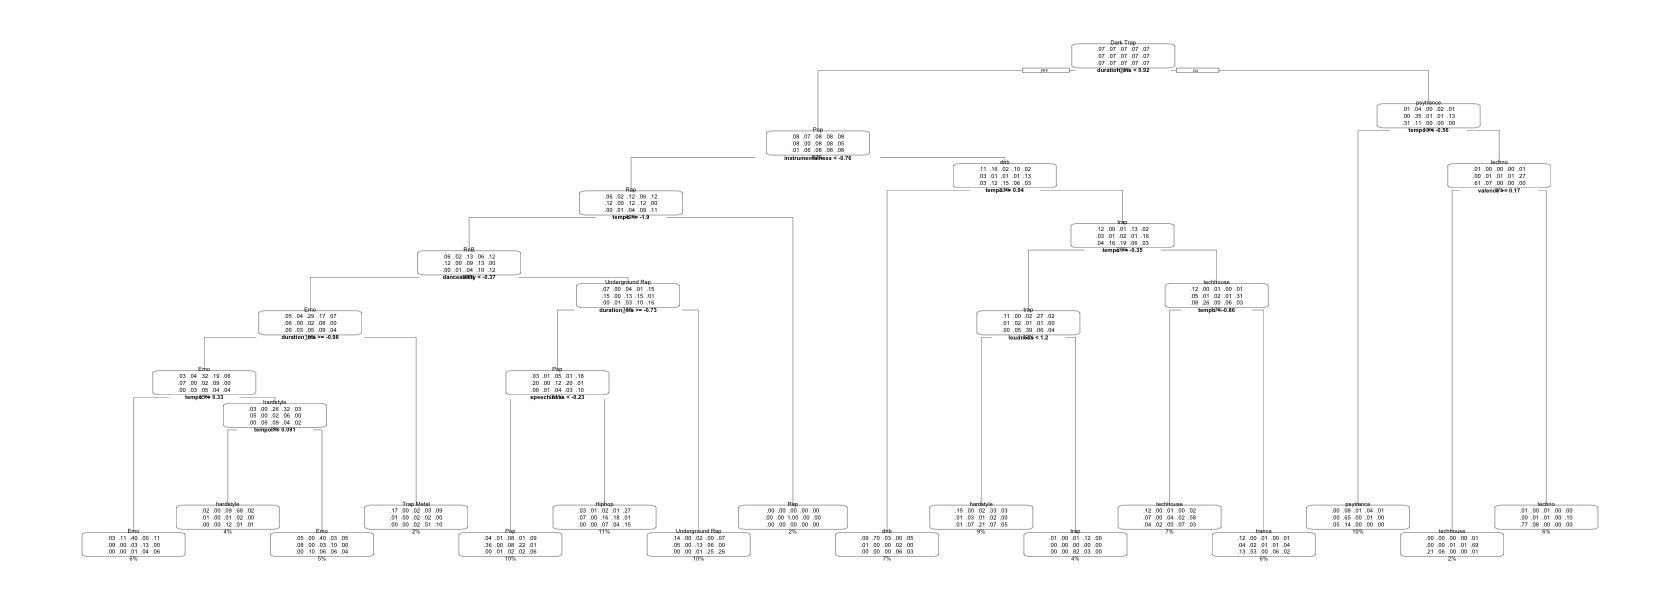

In [33]:
DT1 <- rpart(genre~., data=bal_train, method = 'class')
rpart.plot(DT1)

#### b) Evaluate Model Performance

The accuracy is 48%, which is the lowest so far. Thus, to have a better accuracy, below I built some tree-based ensemble learning models.

In [34]:
DT1_predict <- predict(DT1, newdata = test, type='class')
DT1_metrics <- confusionMatrix(DT1_predict, test$genre) # Accuracy = 0.48
DT1_metrics$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.4813056      0.4417509      0.4705852      0.4920390      0.1268843 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

### 4. Random Forest (Bagging)
#### a) Build a Random Forest
Random Forest is a method that can solve the overfitting problem in a decision tree. I first set the number of trees (ntree) equals 500 and got the OOB error rate 26.72%.

In [35]:
set.seed(0101)
RF1 <-randomForest(genre~., data=bal_train, ntree=500) 
print(RF1) # OOB error rate: 26.72%


Call:
 randomForest(formula = genre ~ ., data = bal_train, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 26.72%
Confusion matrix:
                Dark Trap  dnb  Emo hardstyle Hiphop  Pop psytrance  Rap  RnB
Dark Trap             880   26   50        43     69   20        10   92   99
dnb                     3 2202   17         0     11    3         0    0    4
Emo                    26   10 1887        35     30   94         0   11   79
hardstyle              13    0   12      2074      0    2        25    0    2
Hiphop                130    6   53         5    982   55         1  225  398
Pop                    10    1   85         0     15 2032         0   21   49
psytrance              14    0    0         8      1    0      2082    0    0
Rap                    56    1   11         4    173   38         0 1502  136
RnB                    63 

#### b) Tune hyperparameters - ntree
To tune ntree (the number of trees), I plot the trees & Error. From the bottom graph, we can tell that the black line seems stable after ntree=300. Thus, we do not have to increase the number of trees, since 500 is enough.

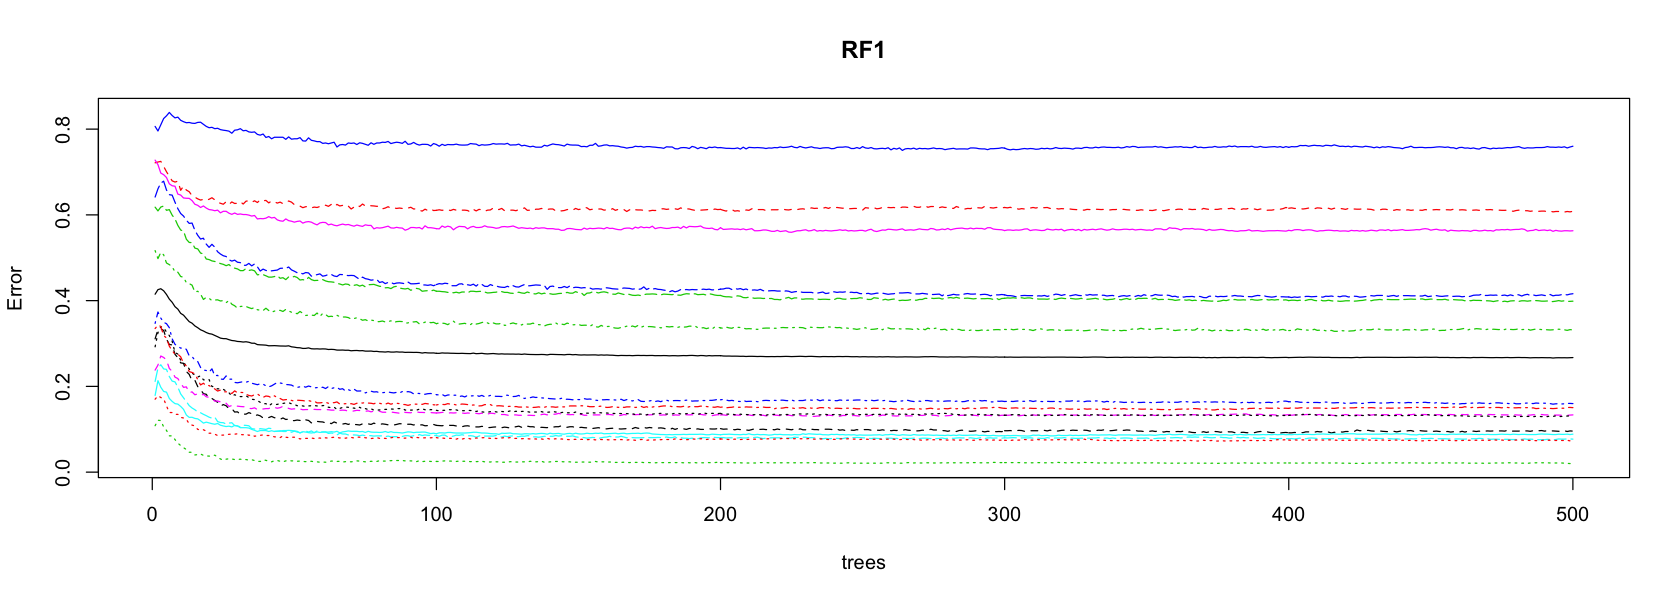

In [36]:
plot(RF1)

#### c) Tune hyperparameters - mtry
To tune mtry (the number of variables randomly sampled as candidates at each split), I used the <em>tuneRF</em> function. From the bottom graph, we can tell that the OOB error will be the lowest when mtry=3. The default value of mtry for classification is sqrt(p), where p is the number of variables in x. In our case, since we have 13 predictors, the default value of mtry is also 3. Therefore, we do not have to change the value of mtry.

mtry = 3  OOB error = 26.44% 
Searching left ...
mtry = 2 	OOB error = 26.77% 
-0.0122307 0.05 
Searching right ...
mtry = 6 	OOB error = 26.73% 
-0.01099641 0.05 


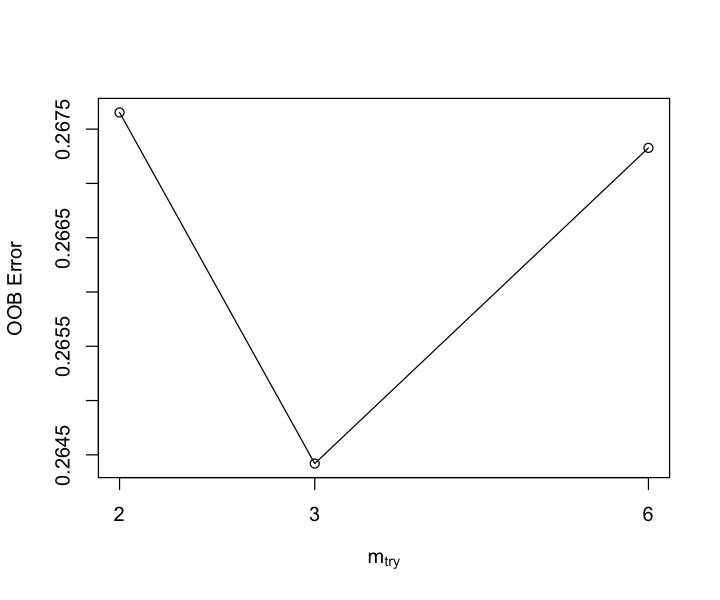

In [37]:
options(repr.plot.width = 6, repr.plot.height = 5)
mtry <- tuneRF(bal_train[-Y_index],bal_train$genre, 
                   ntreeTry=500, stepFactor=2,improve=0.05, trace=TRUE, plot=TRUE)

#### d) Evaluate Model Performance
Finally, I used the random forest to predict test data, created a confusion matrix, and calculated the accuracy. Although we got OOB error rate 26.72%, the accuracy on the test dataset is only 65%.

In [38]:
set.seed(0101)
RF1_predict <- predict(RF1, test, type = "class") 
RF1_metrics <- confusionMatrix(RF1_predict, test$genre) # Accuracy = 0.65
RF1_metrics$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.6510386      0.6239748      0.6407505      0.6612221      0.1268843 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

### 5. XGB (Boosting)
#### a) Find the Best Iiteration 
Apart from the random forest, another decision-tree-based ensemble machine learning is the XGBoost. To find the best iteration, I used <em>xgb.cv</em> function to perform cross-validation.

In [39]:
numberOfClasses <- length(unique(bal_train_Y))
xgb_params <- list("objective" = "multi:softprob",
                   "eval_metric" = "mlogloss",
                   "num_class" = numberOfClasses)

# convert factor to numeric 
train_labs <- as.numeric(bal_train$genre) - 1
test_labs <- as.numeric(test$genre) - 1

# make xgb.DMatrix
train_matrix <- xgb.DMatrix(data = as.matrix(bal_train[-Y_index]), label =train_labs)
test_matrix <- xgb.DMatrix(data = as.matrix(test[-Y_index]), label=test_labs)

# cross validation 
set.seed(0101)
xgbcv <- xgb.cv( params = xgb_params, 
                 data = train_matrix, 
                 nrounds = 100, nfold = 5, 
                 showsd = T, stratified = T, 
                 print_every_n = 10, early_stopping_rounds = 20, maximize = F)

xgbcv$best_iteration # 73

[1]	train-mlogloss:1.774091+0.003450	test-mlogloss:1.820985+0.004915 
Multiple eval metrics are present. Will use test_mlogloss for early stopping.
Will train until test_mlogloss hasn't improved in 20 rounds.

[11]	train-mlogloss:0.819050+0.002849	test-mlogloss:0.983314+0.006448 
[21]	train-mlogloss:0.651532+0.004045	test-mlogloss:0.874111+0.007699 
[31]	train-mlogloss:0.560381+0.005525	test-mlogloss:0.837150+0.009457 
[41]	train-mlogloss:0.491518+0.005888	test-mlogloss:0.817622+0.010881 
[51]	train-mlogloss:0.436341+0.005001	test-mlogloss:0.807005+0.011970 
[61]	train-mlogloss:0.390329+0.005876	test-mlogloss:0.801161+0.011737 
[71]	train-mlogloss:0.350772+0.004241	test-mlogloss:0.798324+0.012808 
[81]	train-mlogloss:0.318158+0.002740	test-mlogloss:0.798200+0.013181 
[91]	train-mlogloss:0.289196+0.003107	test-mlogloss:0.800391+0.013513 
Stopping. Best iteration:
[73]	train-mlogloss:0.343792+0.003877	test-mlogloss:0.797690+0.012755



[1] 73

#### b) Build a XGBoost
Then, I built a model using <em>xgb.train</em> function with the best iteration value.

In [40]:
XGB1 <- xgb.train (params = xgb_params, 
                   data = train_matrix, 
                   nrounds = xgbcv$best_iteration, 
                   watchlist = list(val=test_matrix,train=train_matrix), 
                   print_every_n = 10, early_stopping_rounds = 10, maximize = F)

[1]	val-mlogloss:1.845884	train-mlogloss:1.778210 
Multiple eval metrics are present. Will use train_mlogloss for early stopping.
Will train until train_mlogloss hasn't improved in 10 rounds.

[11]	val-mlogloss:1.053824	train-mlogloss:0.834849 
[21]	val-mlogloss:0.962733	train-mlogloss:0.671169 
[31]	val-mlogloss:0.934940	train-mlogloss:0.585588 
[41]	val-mlogloss:0.922321	train-mlogloss:0.523815 
[51]	val-mlogloss:0.919585	train-mlogloss:0.475074 
[61]	val-mlogloss:0.921205	train-mlogloss:0.430843 
[71]	val-mlogloss:0.922662	train-mlogloss:0.389839 
[73]	val-mlogloss:0.923370	train-mlogloss:0.383000 


#### c) Evaluate Model Performance
Finally, I used the XGBoost to predict test data, created a confusion matrix, and calculated the accuracy, which is the highest so far, 66%.

In [41]:
XGB1_predict <- predict(XGB1, newdata = test_matrix)
XGB1_prediction <- matrix(XGB1_predict, nrow = numberOfClasses,
                          ncol=length(XGB1_predict)/numberOfClasses) %>%
  t() %>%
  data.frame() %>%
  mutate(label = test_labs + 1,
         max_prob = max.col(., "last"))

XGB1_metrics <- confusionMatrix(factor(XGB1_prediction$max_prob),
                                factor(XGB1_prediction$label, levels=), 
                                mode = "everything")
XGB1_metrics$overall # Accuracy = 0.66

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.6611276      0.6347937      0.6509068      0.6712368      0.1268843 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

## Feature Importance
Apart from calculating the accuracy, I also interpreted models by viewing which features are most important when forecasting.

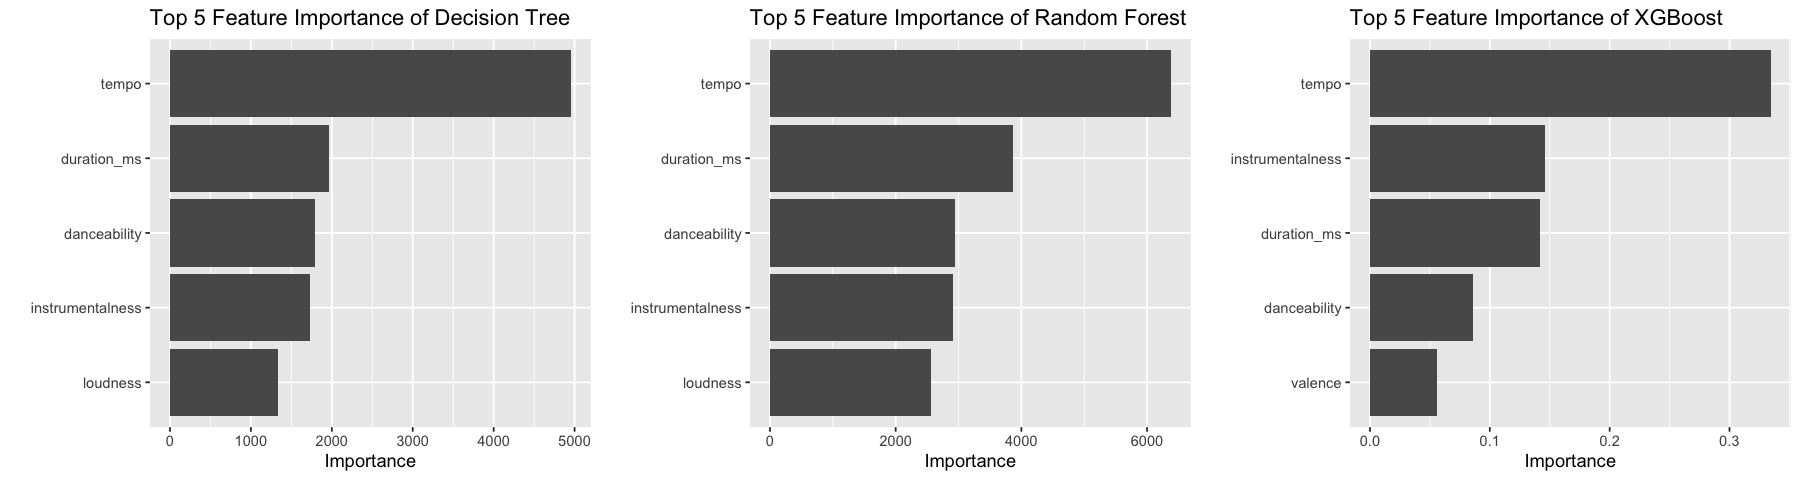

In [45]:
options(repr.plot.width=15, repr.plot.height=4)

DT_fp <- vip(DT1, num_features=5) + ggtitle("Top 5 Feature Importance of Decision Tree")
RF_fp <- vip(RF1, num_features=5) + ggtitle("Top 5 Feature Importance of Random Forest")
XGB_fp <- vip(XGB1, num_features=5) + ggtitle("Top 5 Feature Importance of XGBoost")

ggarrange(DT_fp, RF_fp, XGB_fp, nrow = 1, ncol = 3)

To summarize results above, I found that when predicting genre, <strong>“tempo”</strong> is the most important audio feature.

## Conclusion
To compare models’ performances, I built a table shown below. From the table, we can tell that the ensemble learning algorithms gave us better accuracy.

**Models**|Accuracy
-----|-----
**Logistic Regression**|0.53
**KNN (Euclidean)**|0.53
**KNN (Manhattan)**|0.56
**Decision Tree**|0.48
**Random Forest**|0.65
**XGBoosting**|<strong>0.66</strong>

Yet, since the dataset is <strong>imbalanced</strong> and is <strong>multiclass</strong> classification, I would like to take the XGBoost model as an example to examine the <strong>True Positive Rate</strong> and <strong>F1 score</strong> of each genre.

**Genre**|Dark Trap|dnb|Emo|hardstyle|Hiphop|Pop|psytrance|Rap|RnB|techhouse|techno|trance|trap|Trap Metal|Underground Rap
-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----
**TPR**|0.40|0.99|0.70|0.93|0.43|<span style="color:red">0.23</span>|0.91|0.52|0.47|0.88|0.87|0.87|0.86|0.50|<span style="color:red">0.29</span>
**F1**|0.47|0.99|0.69|0.90|0.44|0.19|0.92|0.41|0.42|0.88|0.86|0.83|0.86|0.39|0.35

From the table above, we can see that in terms of TPR, among 15 genres, 7 of them have rates higher than 85% (dnb, hardstyle, psytrance, techhouse, techno, trance, and trap). However, genres such as "Pop" and "Underground Rap" have TPR lower than 30%. Similar situations happened in the case of the F1 score. That is to say, the model can only highly correctly predict some of the genres.

In [43]:
#XGB1_metrics[["byClass"]][ , "Recall"]
#XGB1_metrics[["byClass"]][ , "F1"]

## Future Scope
To sum up, since I found that "Pop" has the least number of observations in the dataset, to improve models and the True Positive Rates, in the future, perhaps we could add more Pop songs' data. Also, we can perform feature transformation, treat outlier values separately, apply feature selection based on feature importance results, or keep tuning algorithms. By doing so, I hope to help Spotify correctly predict the genre of a new song and make precise genre-based playlists for customers to explore.

## References
Ashrith. (2018, December 3). <em>What Makes a Song Likeable?</em> Retrieved from https://towardsdatascience.com/what-makes-a-song-likeable-dbfdb7abe404<br />
Brownlee, J. (2020, May 27). <em>How to Scale Data With Outliers for Machine Learning</em>. Retrieved from https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/ <br />
SaiGayatri, V. (2017, Dec 29). <em>Day 8: Data transformation — Skewness, normalization and much more</em>. Retrieved from https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55